# Problem 1

In [5]:
import numpy as np

arrival_rate = 2          
num_channels = 3          
channel_mean_time = 1     
end_time = 10             
num_simulations = 100

def simulate_poisson_process_interarrival(end_time, rate):
    arrival_times = []
    current_time = 0
    while current_time < end_time:
        interarrival_time = np.random.exponential(1 / rate)
        current_time += interarrival_time
        if current_time < end_time:
            arrival_times.append(current_time)
    return arrival_times

def probability():
    all_busy_count = 0
    
    for _ in range(num_simulations):
        arrival_times = simulate_poisson_process_interarrival(end_time, arrival_rate)
        
        channel_occupancy = [0] * num_channels
        
        for arrival_time in arrival_times:
            free_channel = None
            for i in range(num_channels):
                if channel_occupancy[i] <= arrival_time:
                    free_channel = i
                    break
            
            if free_channel is not None:
                occupancy_time = np.random.exponential(channel_mean_time)
                channel_occupancy[free_channel] = arrival_time + occupancy_time
        
        if all(end_time <= occupancy for occupancy in channel_occupancy):
            all_busy_count += 1

    return all_busy_count / num_simulations

busy_probability = probability()
print(f"Estimated probability that all channels are busy at the 10th hour: {busy_probability:.4f}")

Estimated probability that all channels are busy at the 10th hour: 0.2000


# Problem 2

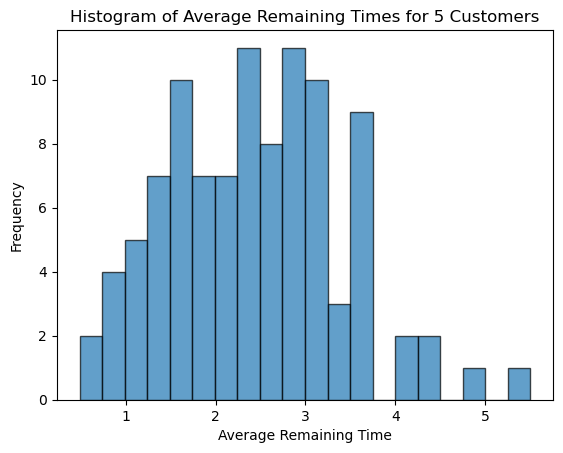

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rho = 1
t = 10
num_customers = 5
num_replications = 100

average_remaining_times = []

for _ in range(num_replications):
    remaining_times = []

    for _ in range(num_customers):
        arrival_time = np.random.uniform(0, t)
    
        remaining_time = np.random.uniform(0, t - arrival_time)
        
        remaining_times.append(remaining_time)
    
    average_remaining_times.append(np.mean(remaining_times))

plt.hist(average_remaining_times, bins=20, edgecolor='k', alpha=0.7)
plt.title("Histogram of Average Remaining Times for 5 Customers")
plt.xlabel("Average Remaining Time")
plt.ylabel("Frequency")
plt.show()

# Problem 3

In [21]:
def lambda_t(t):
    return 2 + np.cos(2 * np.pi * t)

# Inter-arrival time approach to simulate the inhomogeneous Poisson process
def simulate_interarrival_approach(T=10, lambda_max=3):
    times = []
    current_time = 0
    while current_time < T:
        U = np.random.uniform(0, 1)
        delta_t = -np.log(U) / lambda_max
        current_time += delta_t
        if current_time >= T:
            break
        if np.random.uniform(0, 1) <= lambda_t(current_time) / lambda_max:
            times.append(current_time)
    return times

# Estimate E[∫_0^10 N(t) dt] using replication
def estimate_time_averaged_customers(replications=100, T=10):
    integrals = []
    for _ in range(replications):
        arrival_times = simulate_interarrival_approach(T)
        
        # Add start and end times for convenience
        arrival_times = [0] + arrival_times + [T]
        
        # Sum over intervals between arrival times
        integral_estimate = sum((arrival_times[i+1] - arrival_times[i]) * i
                                for i in range(len(arrival_times) - 1)) / T
        integrals.append(integral_estimate)
    
    # Average across replications
    return np.mean(integrals)

# Run the estimation
expected_time_averaged_customers_interarrival = estimate_time_averaged_customers()
print(f"Expected time-averaged number of customers (inter-arrival): {expected_time_averaged_customers_interarrival:.4f}")

Expected time-averaged number of customers (inter-arrival): 9.6898


In [24]:
import numpy as np

def cumulative_intensity(T):
    return 2 * T  # Since integral of lambda(t) over [0, T] is 2*T

def simulate_conditional_representation(T=10):
    Lambda_T = cumulative_intensity(T)
    N_T = np.random.poisson(Lambda_T)
    arrival_times = np.sort(np.random.uniform(0, T, N_T))
    return arrival_times

# Run the estimation
expected_time_averaged_customers_conditional = estimate_time_averaged_customers()
print(f"Expected time-averaged number of customers (conditional): {expected_time_averaged_customers_conditional:.4f}")

Expected time-averaged number of customers (conditional): 10.1266


In [29]:
import numpy as np

def inverse_cdf(U, T=10):
    Lambda_T = cumulative_intensity(T)
    lower, upper = 0, T
    epsilon = 1e-6
    while upper - lower > epsilon:
        mid = (lower + upper) / 2
        F_mid = (2 * mid + (1 / (2 * np.pi)) * np.sin(2 * np.pi * mid)) / Lambda_T
        if F_mid < U:
            lower = mid
        else:
            upper = mid
    return (lower + upper) / 2

def simulate_alternative_method(T=10):
    Lambda_T = 20
    N_T = np.random.poisson(Lambda_T)
    arrival_times = [inverse_cdf(np.random.uniform(0, 1), T) for _ in range(N_T)]
    return sorted(arrival_times)

# Run the estimation
expected_time_averaged_customers_alternative = estimate_time_averaged_customers()
print(f"Expected time-averaged number of customers (alternative): {expected_time_averaged_customers_alternative:.4f}")

Expected time-averaged number of customers (alternative): 10.3743
